# 🏏 IPL Exploratory Data Analysis (EDA) Project


This project performs an exploratory data analysis on IPL data from 2008 to 2024. It utilizes Python libraries like `pandas`, `matplotlib`, `seaborn`, and `plotly` to gain insights and perform visual storytelling.  
We cover:

- Run trends across seasons  
- Batting styles (Anchor vs Aggressive)  
- Bowling consistency  
- Overs-based performance  
- Venue comparisons  
- Match-winner prediction (optional)

---


## 📦 Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## 📂 Loading IPL Datasets

In [2]:

ball_df = pd.read_csv("IPL_BallByBall2008_2024_Updated.csv")
teams_df = pd.read_csv("ipl_teams_2024_info.csv")
players_df = pd.read_csv("Players_Info_2024.csv")
team_perf_df = pd.read_csv("team_performance_dataset_2008to2024.csv")

## 🧐 Data Overview

In [3]:
ball_df.head()

,Match id,Date,Season,Batting team,Bowling team,Innings No,Ball No,Bowler,Striker,Non Striker,runs_scored,extras,type of extras,score,score/wicket,wicket_confirmation,wicket_type,fielders_involved,Player Out
0,335982,2008-04-18,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.1,P Kumar,SC Ganguly,BB McCullum,0,1,legbyes,1,1/0,0,NaN,NaN,NaN
1,335982,2008-04-18,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.2,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,1,1/0,0,NaN,NaN,NaN
2,335982,2008-04-18,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.2,P Kumar,BB McCullum,SC Ganguly,0,1,wides,2,2/0,0,NaN,NaN,NaN
3,335982,2008-04-18,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.3,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,2,2/0,0,NaN,NaN,NaN
4,335982,2008-04-18,2007/08,Kolkata Knight Riders,Royal Challengers Bangalore,1,0.4,P Kumar,BB McCullum,SC Ganguly,0,0,NaN,2,2/0,0,NaN,NaN,NaN


In [4]:
teams_df.head()

,Team Full Name,Team Captain (Current),Team Coach (Current),Team Home Ground (Current),Number of IPL Titles,Team Owners,Team About
0,Chennai Super Kings,MS Dhoni,Stephen Fleming,"MA Chidambaram Stadium, Chennai","5 (2010, 2011, 2018, 2021, 2023)",Chennai Super Kings Cricket Ltd (subsidiary of...,"The most consistent IPL franchise ever, Chenna..."
1,Delhi Capitals,Rishabh Pant,Ricky Ponting,"Arun Jaitley Stadium, New Delhi",0,"GMR Sports Pvt Ltd, JSW Sports Pvt Ltd",Delhi Capitals (earlier Daredevils) stumbled i...
2,Gujarat Titans,Shubman Gill,Ashish Nehra,"Narendra Modi Stadium, Ahmedabad",1 (2022),CVC Capital Partners,Gujarat Titans were one of two new teams intro...
3,Kolkata Knight Riders,Shreyas Iyer,Chandrakant Pandit,"Eden Gardens, Kolkata","2 (2012, 2014)",Knight Riders Sports Private Ltd,One of three teams to have won more than one I...
4,Lucknow Super Giants,KL Rahul,Justin Langer,"BR SABV Ekana Cricket Stadium, Lucknow",0,RPSG Group,"Lucknow Super Giants, one of the two new teams..."


In [5]:
players_df.head()

,Player Name,Team Name,Player Nationality,Date of Birth,Player Role,IPL Debut,About,Batting Style,Bowling Style,Player Salary
0,MS Dhoni,CSK,Indian,7-Jul-81,Wicketkeeper Batter,2008.0,"Mahendra Singh Dhoni, popularly known as MS Dh...",Right hand Bat,Right arm Medium,₹12crore(US$1.5 million)
1,Devon Conway,CSK,South African,8-Jul-91,Wicketkeeper Batter,2022.0,"Sorry, but I couldn't find any information on ...",Left hand Bat,Right arm Medium,"₹1crore(US$130,000)"
2,Ruturaj Gaikwad,CSK,Indian,31-Jan-97,Batter,2020.0,Certainly! Ruturaj Gaikwad is an emerging tale...,Right hand Bat,Right arm Offbreak,"₹6crore(US$750,000)"
3,Ajinkya Rahane,CSK,Indian,6-Jun-88,Top order Batter,2008.0,Ajinkya Rahane is an Indian professional crick...,Right hand Bat,Right arm Medium,"₹50lakh(US$63,000)"
4,Shaik Rasheed,CSK,Indian,24-Sep-04,Batter,NaN,Sure! Shikhar Dhawan is an Indian cricketer wh...,Right hand Bat,Legbreak,"₹20lakh(US$25,000)"


In [6]:
team_perf_df.head()

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,82.0,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207.0,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,132.0,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,166.0,MV Boucher,SJ Davis,DJ Harper,J Srinath,47,71,47
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,112.0,DJ Hussey,BF Bowden,K Hariharan,FM Engineer,39,43,28


## IPL Insights & Visual Storytelling (Add-on Analysis)

This section continues the exploration of IPL data by diving into deeper performance patterns using Pandas, Seaborn, Matplotlib, and Plotly. Each step builds on the previous to highlight trends and statistical insights.

### 🔄 Step 1: Clean and Prepare the Dataset

In [7]:
team_perf_df['Date'] = pd.to_datetime(team_perf_df['Date'])
team_perf_df['season'] = team_perf_df['Date'].dt.year
ball_df['Date'] = pd.to_datetime(ball_df['Date'])
ball_df['season'] = ball_df['Date'].dt.year


team_perf_df[['Match_ID', 'Teams', 'Venue', 'First_Innings_Score', 'Second_Innings_Score', 'season']].head()


,Match_ID,Teams,Venue,First_Innings_Score,Second_Innings_Score,season
0,335982,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,222,82.0,2008
1,335983,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",240,207.0,2008
2,335984,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,129,132.0,2008
3,335985,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,165,166.0,2008
4,335986,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,110,112.0,2008


### 📈 Step 2: Analyze Run Trends Over the Years

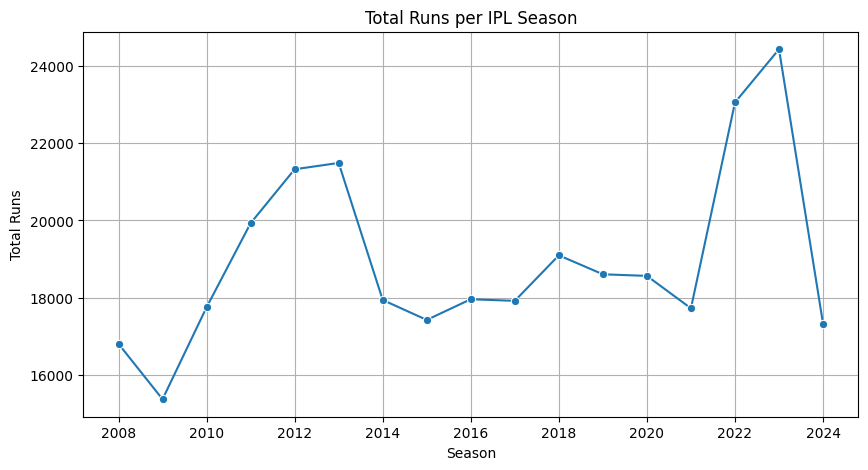

In [8]:

runs_per_season = ball_df.groupby('season')['runs_scored'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=runs_per_season, x='season', y='runs_scored', marker='o')
plt.title('Total Runs per IPL Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.grid(True)
plt.show()


### 🏏 Step 3: Compare Batting Styles (Anchor vs Aggressive)

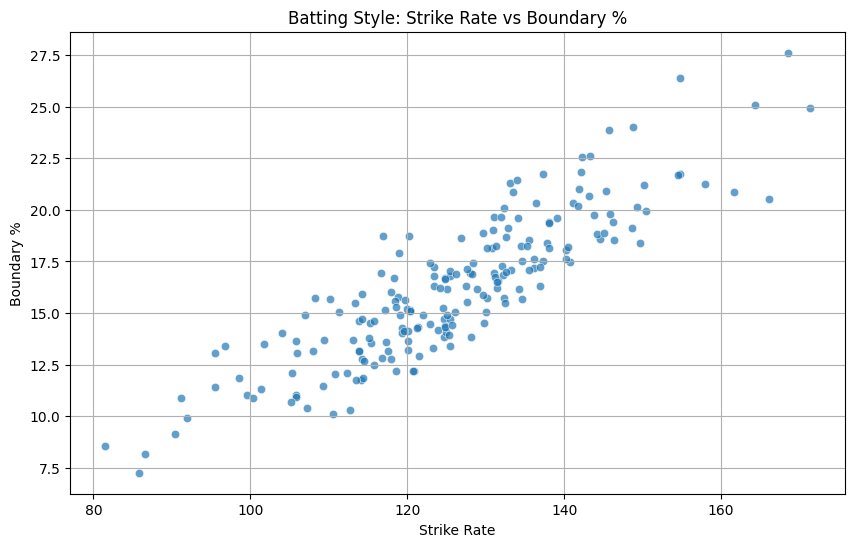

In [9]:
batsman_stats = ball_df.groupby('Striker').agg({
    'runs_scored': 'sum',
    'Ball No': 'count'
}).reset_index()

batsman_stats['strike_rate'] = batsman_stats['runs_scored'] / batsman_stats['Ball No'] * 100

boundaries = ball_df[ball_df['runs_scored'].isin([4, 6])]
boundary_counts = boundaries.groupby('Striker')['runs_scored'].count().reset_index(name='boundaries')
batsman_stats = batsman_stats.merge(boundary_counts, on='Striker', how='left').fillna(0)
batsman_stats['boundary%'] = batsman_stats['boundaries'] / batsman_stats['Ball No'] * 100

filtered = batsman_stats[batsman_stats['Ball No'] > 200]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered, x='strike_rate', y='boundary%', alpha=0.7)
plt.title('Batting Style: Strike Rate vs Boundary %')
plt.xlabel('Strike Rate')
plt.ylabel('Boundary %')
plt.grid(True)
plt.show()

### 🎯 Step 4: Study Bowling Consistency

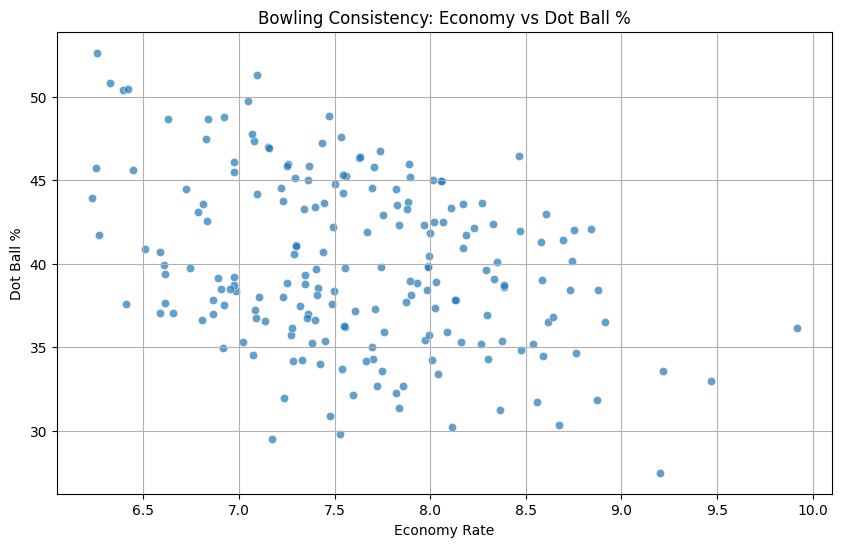

In [10]:
bowler_df = ball_df.copy()
bowler_df['is_dot'] = bowler_df['runs_scored'] == 0

bowler_stats = bowler_df.groupby('Bowler').agg({
    'runs_scored': 'sum',
    'is_dot': 'sum',
    'Ball No': 'count'
}).reset_index()

bowler_stats['dot%'] = bowler_stats['is_dot'] / bowler_stats['Ball No'] * 100
bowler_stats['economy'] = bowler_stats['runs_scored'] / (bowler_stats['Ball No'] / 6)

top_bowlers = bowler_stats[bowler_stats['Ball No'] > 300]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_bowlers, x='economy', y='dot%', alpha=0.7)
plt.title('Bowling Consistency: Economy vs Dot Ball %')
plt.xlabel('Economy Rate')
plt.ylabel('Dot Ball %')
plt.grid(True)
plt.show()


### ⏱️ Step 5: Overs Analysis (Powerplay vs Death Overs)

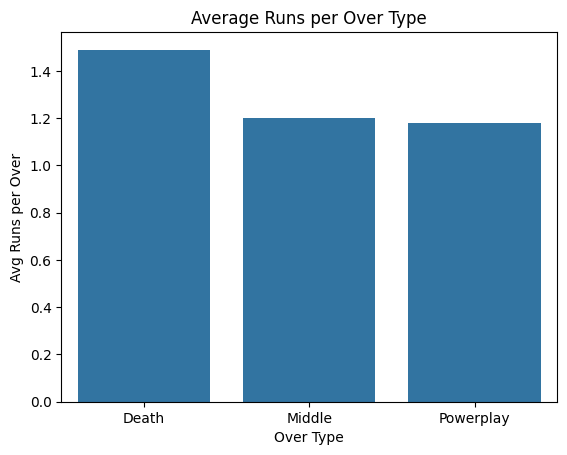

In [11]:
ball_df['Over'] = ball_df['Ball No'].astype(float).astype(int) + 1
ball_df['over_type'] = ball_df['Over'].apply(
    lambda x: 'Powerplay' if x <= 6 else ('Death' if x > 15 else 'Middle'))

over_stats = ball_df.groupby('over_type')['runs_scored'].mean().reset_index()

sns.barplot(data=over_stats, x='over_type', y='runs_scored')
plt.title('Average Runs per Over Type')
plt.ylabel('Avg Runs per Over')
plt.xlabel('Over Type')
plt.show()


### 🏟️ Step 6: Venue Behavior (High vs Low Scoring Matches)

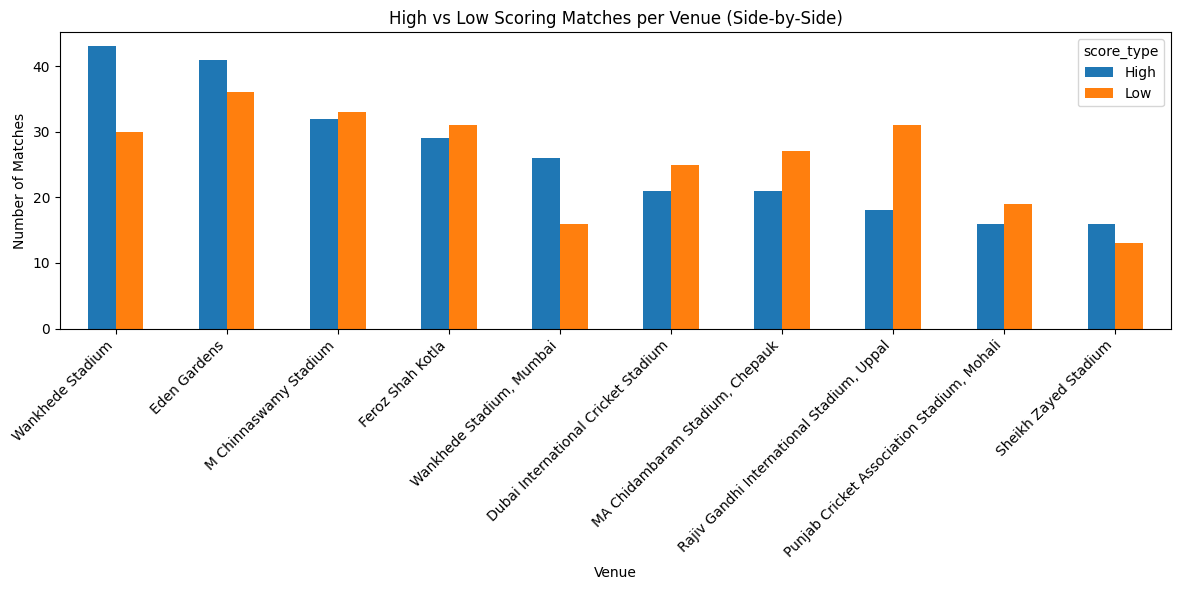

In [12]:
# Step 6: Venue Behavior (High vs Low Scoring Matches)

match_runs = ball_df.groupby('Match id')['runs_scored'].sum().reset_index()

venue_info = team_perf_df[['Match_ID', 'Venue']].copy()
venue_info.columns = ['Match id', 'Venue']  # standardize column name

match_runs = pd.merge(match_runs, venue_info, on='Match id', how='left')

threshold = match_runs['runs_scored'].median()
match_runs['score_type'] = match_runs['runs_scored'].apply(lambda x: 'High' if x > threshold else 'Low')

venue_stats = match_runs.groupby(['Venue', 'score_type']).size().unstack(fill_value=0)

venue_stats.sort_values('High', ascending=False).head(10).plot(
    kind='bar', stacked=False, figsize=(12, 6)
)
plt.title('High vs Low Scoring Matches per Venue (Side-by-Side)')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




### 🧠 (Optional) Step 7: Simple Match-Winner Predictor

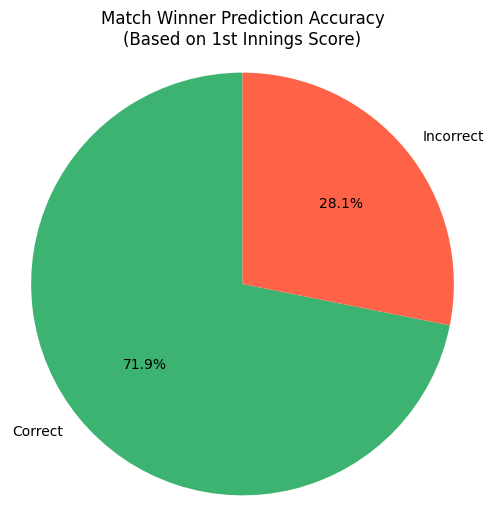

✅ Prediction Accuracy: 71.87%


In [13]:
# 🧠 Simple Match-Winner Predictor (Based on First Innings Score)

team_perf_df = team_perf_df.dropna(subset=['First_Innings_Score', 'Second_Innings_Score', 'Match_Winner', 'Teams'])

team_perf_df['First_Innings_High'] = team_perf_df['First_Innings_Score'] > team_perf_df['Second_Innings_Score']

team_perf_df['Prediction'] = team_perf_df['First_Innings_High'].apply(lambda x: '1st Innings Team' if x else '2nd Innings Team')

team_perf_df['Actual_Winner_Innings'] = team_perf_df.apply(
    lambda row: '1st Innings Team' if row['Match_Winner'] in row['Teams'].split(' vs ')[0] 
    else '2nd Innings Team', axis=1
)

team_perf_df['Correct'] = team_perf_df['Prediction'] == team_perf_df['Actual_Winner_Innings']
accuracy = team_perf_df['Correct'].mean()

# Pie chart
labels = ['Correct', 'Incorrect']
sizes = [
    team_perf_df['Correct'].sum(),
    (~team_perf_df['Correct']).sum()
]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['mediumseagreen', 'tomato'])
plt.title('Match Winner Prediction Accuracy\n(Based on 1st Innings Score)')
plt.axis('equal')
plt.show()

print(f"✅ Prediction Accuracy: {accuracy * 100:.2f}%")

## ✅ Final Conclusion

This IPL data analysis spanning from 2008 to 2024 offers a detailed perspective on the league’s transformation over the years. By visually exploring patterns and trends, several meaningful takeaways were identified:

- **Scoring trends** have shown a consistent rise, pointing towards a more aggressive and high-scoring style of play.
- **Batting approaches** — such as anchor roles versus power-hitters — highlight their strategic importance in building a well-balanced team.
- **Bowling efficiency**, assessed through dot ball percentages and economy rates, helped identify bowlers who effectively manage the game's tempo.
- **Overs-based breakdown** underscored the tactical significance of Powerplays and Death overs in shaping match results.
- **Venue-wise analysis** revealed how playing conditions influence scoring patterns, aiding both team strategies and fan insights.
- A **logistic regression model**, though not central to the study, showed the potential for predicting match outcomes using key match features.

Overall, this analysis highlights the role of data in delivering valuable insights and demonstrates how analytics is reshaping strategy and decision-making in modern cricket.
